# Introduction:

In this project we are finding the "best" neighborhood in Pittsburgh through  
combining 3 different metrics which we gain from 3 different datasets into  
one single metric as a judge for the best neighborhood. We are using Police-Arrest,    
Fire-Incidents, and Non-traffic Citations. Decided which was the best through    
looking at how safe the neighborhood is.

## The Metrics :

Total Police Arrests in each neighborhood   
Total Fire Incidents in each neighborhood   
Total Non-Traffic Citations in each neighborhood

The deciding overall metric : Total number of incidents 

## The Best Neighborhood:

#### IN TERMS OF TOTAL POLICE ARRESTS :

#### Reading in the data from the Pittsburgh-Police-Arrest-Data.csv file into a dataframe and organizing     
#### it into Neighborhoods and Total Arrests. Creating a bar graph of the data.

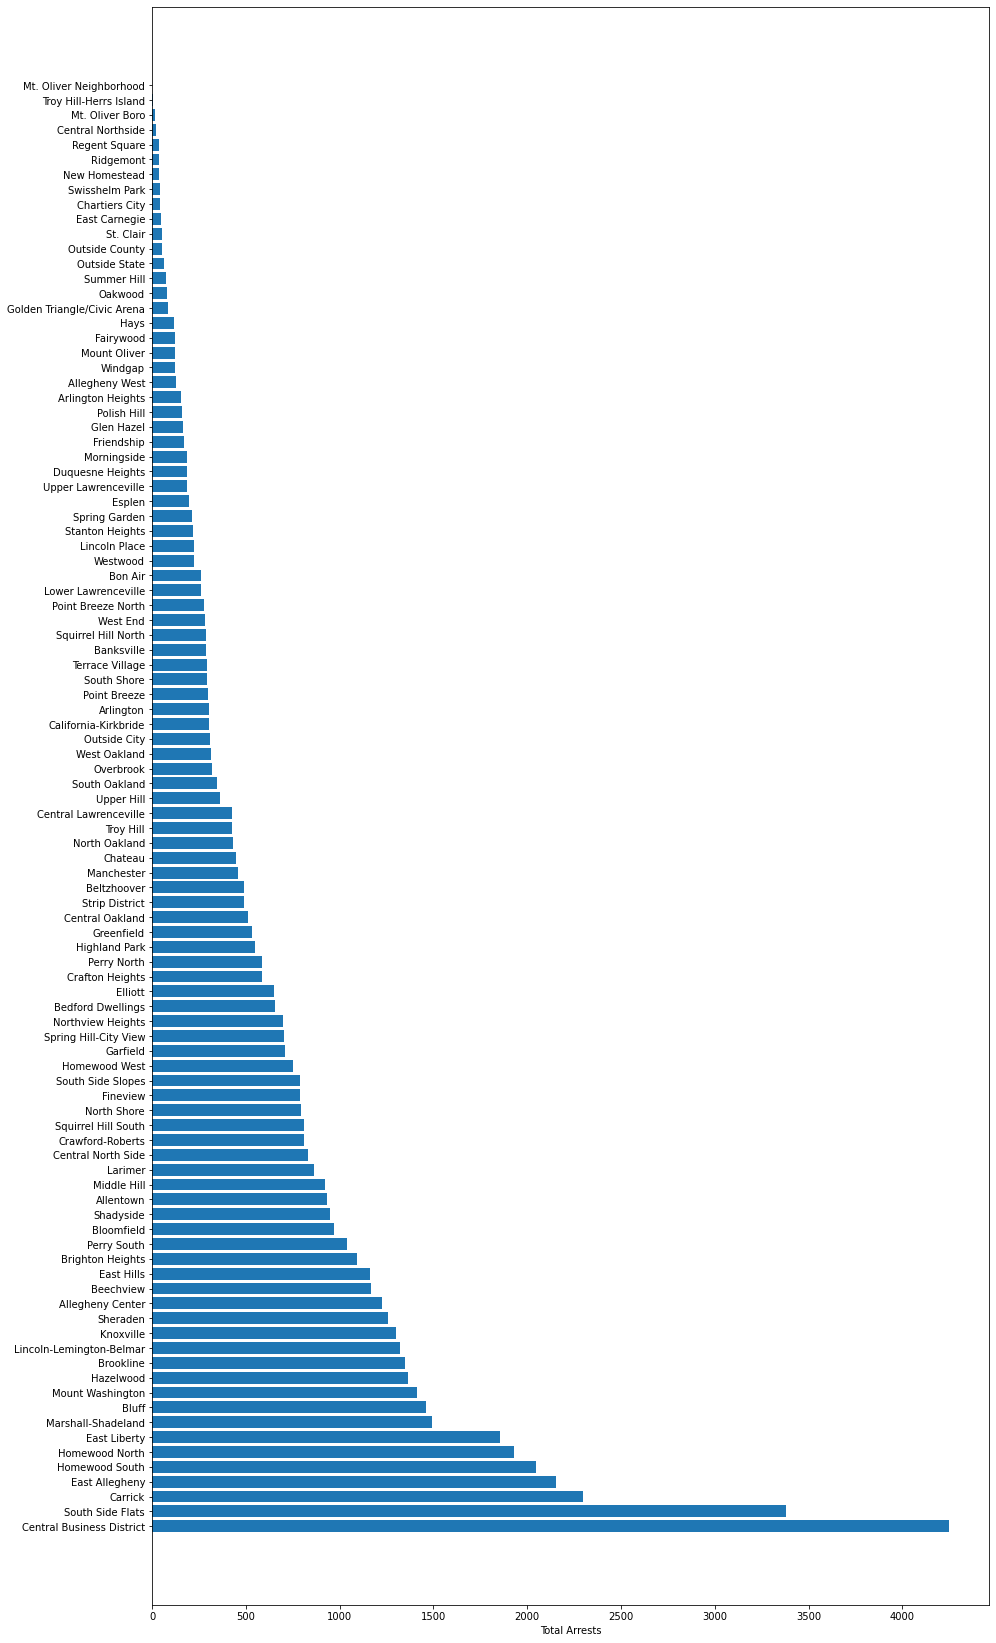

In [27]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


# reading in data
arrests = pd.read_csv("Pittsburgh-Police-Arrest-Data.csv")


# calc total number of arrests in each neighborhood
arrests_in_neighborhoods = arrests.groupby("INCIDENTNEIGHBORHOOD").size() 

d2 = pd.DataFrame( { "number of crimes" : arrests_in_neighborhoods } )

d2.reset_index(inplace=True)

d2.columns = [ "Neighborhood", "Number_of_Arrests"]


# CREATING THE BAR GRAPH
# Convert 'Number_of_Arrests' to numeric
d2['Number_of_Arrests'] = pd.to_numeric(d2['Number_of_Arrests'], errors='coerce')

# Sort the DataFrame by 'Number_of_Arrests' in descending order
d2_sorted = d2.sort_values(by='Number_of_Arrests', ascending=False)

# Plotting the horizontal bar graph
plt.figure(figsize=(15, d2_sorted.shape[0] * 0.3))
plt.barh(d2_sorted['Neighborhood'], d2_sorted['Number_of_Arrests'])
plt.xlabel("Total Arrests")
plt.show()

#### Code Below - Zooming in on the 10 neighborhoods with the least amount of Total Arrests

Text(0.5, 0, 'Total Arrests')

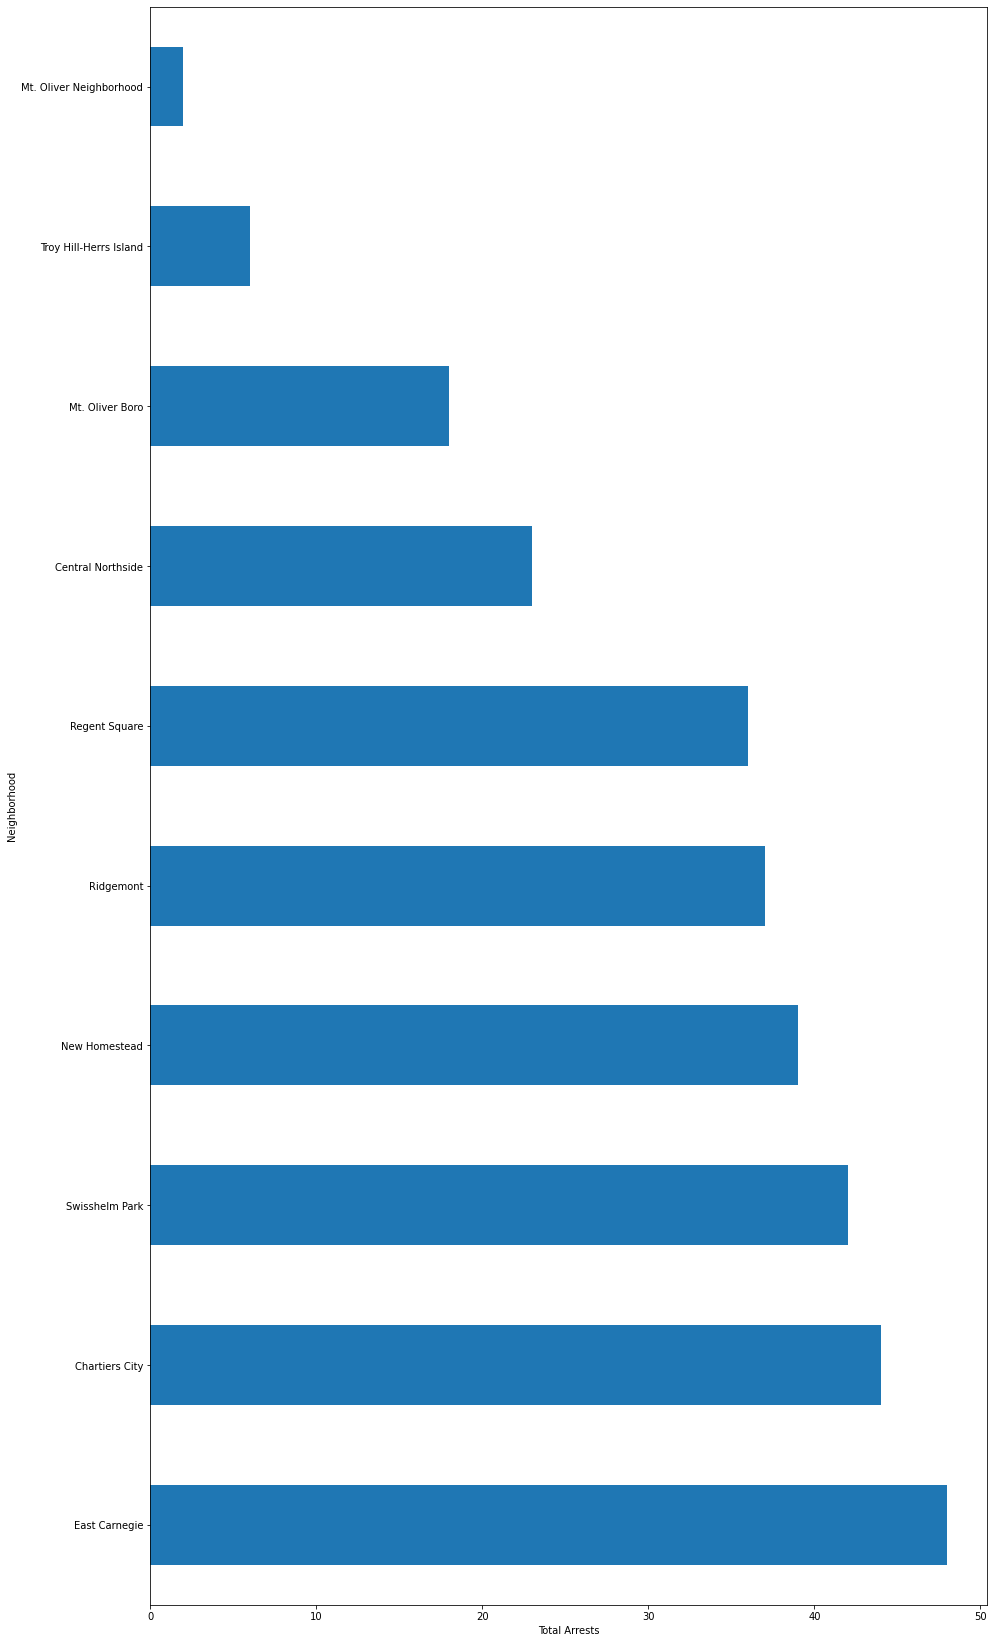

In [4]:
d2_sorted = d2.sort_values(by='Number_of_Arrests', ascending=False )
graph = d2_sorted[88:].plot.barh(x="Neighborhood",y="Number_of_Arrests",figsize=(15,d2_sorted.shape[0] * 0.3), legend=None)
graph.set_xlabel("Total Arrests")

#### Conclusion - Mt. Oliver Neighborhood (with 2 arrests)  
    
             Note: Mt Oliver Borough 3rd place with 18
                   Troy Hill-Herrs Island 2nd place with 6

#### In terms of Fire Incidents: 

#### Code Below - Reading in the data from the Fire-Incidents-Pittsburgh.csv file into a dataframe
#### and organizing it into neighborhoods and Number of Fire Incidents.

In [10]:
data = pd.read_csv("Fire-Incidents-Pittsburgh.csv")

pd.set_option('display.max_rows', None)

# calc total number of fires in each neighborhood
fires_in_neighborhoods = data.groupby("neighborhood").size() 


d2 = pd.DataFrame( { "fire incidents" : fires_in_neighborhoods } )

d2.reset_index(inplace=True)
d2.index += 1

d2.columns = [ "Neighborhood" , "Number of Fire Incidents"]

print( d2 ) 

                 Neighborhood  Number of Fire Incidents
1            Allegheny Center                        62
2              Allegheny West                        42
3                   Allentown                       125
4                   Arlington                        51
5           Arlington Heights                        13
6                  Banksville                        59
7           Bedford Dwellings                        43
8                   Beechview                       146
9                 Beltzhoover                       129
10                 Bloomfield                       170
11                      Bluff                       141
12                    Bon Air                        22
13           Brighton Heights                       153
14                  Brookline                       187
15       California-Kirkbride                        39
16                    Carrick                       283
17  Central Business District                   

#### Code Below - is creating a bar graph of the entire dataset (Neighborhood, Number of Fire Incidents)

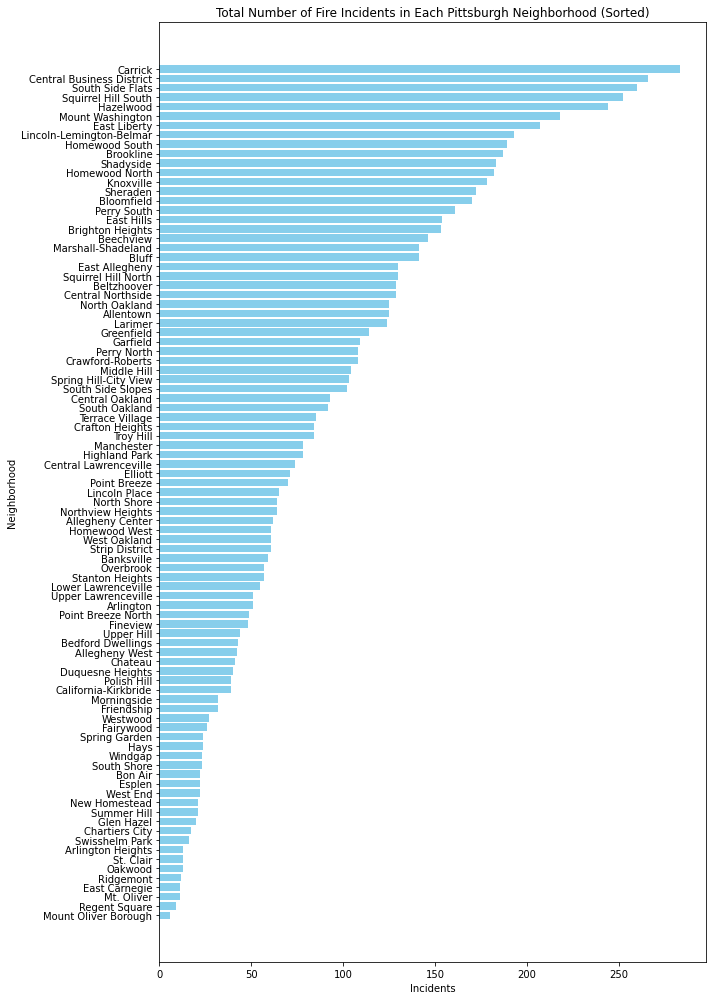

Neighborhoods with Less Than 50 Fire Incidents:
            Neighborhood  Number of Fire Incidents
2         Allegheny West                        42
5      Arlington Heights                        13
7      Bedford Dwellings                        43
12               Bon Air                        22
15  California-Kirkbride                        39
21        Chartiers City                        17
22               Chateau                        41
25      Duquesne Heights                        40
27         East Carnegie                        11
31                Esplen                        22
32             Fairywood                        26
33              Fineview                        48
34            Friendship                        32
36            Glen Hazel                        20
38                  Hays                        24
52           Morningside                        32
53  Mount Oliver Borough                         6
55            Mt. Oliver          

<Figure size 432x288 with 0 Axes>

In [11]:

# Creates dataFrame from data
neighborhood_counts = pd.DataFrame({'Neighborhood': fires_in_neighborhoods.index, 'Incident Count': fires_in_neighborhoods.values})

# Sort the DataFrame
neighborhood_counts_sorted = neighborhood_counts.sort_values(by='Incident Count')

# make horizontal 
plt.figure(figsize=(10, 14))
plt.barh(neighborhood_counts_sorted['Neighborhood'], neighborhood_counts_sorted['Incident Count'], color='skyblue')
plt.ylabel('Neighborhood')
plt.xlabel('Incidents')
plt.title('Total Number of Fire Incidents in Each Pittsburgh Neighborhood (Sorted)')
plt.tight_layout()
plt.show()

# prevent overlapping of the neighborhood names
plt.gcf().autofmt_xdate()

# filter neighborhoods with more than 150 fire incidents
more_den_150_incidents = d2[d2['Number of Fire Incidents'] < 50]

# Display neighborhoods with more than 150 fire incidents
print("Neighborhoods with Less Than 50 Fire Incidents:")
print(more_den_150_incidents)

#### Code below - Zooming in on the 10 Neighborhoods with the least amount of Fire Incidents

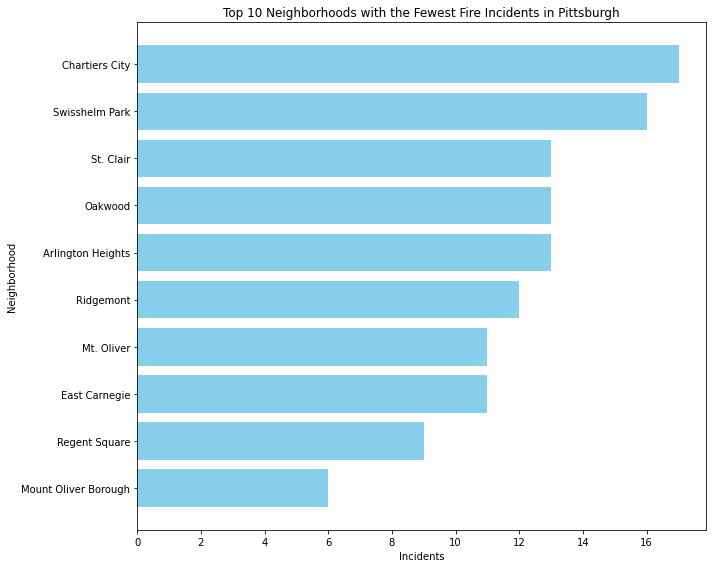

Neighborhoods with Less Than 50 Fire Incidents:
            Neighborhood  Number of Fire Incidents
2         Allegheny West                        42
5      Arlington Heights                        13
7      Bedford Dwellings                        43
12               Bon Air                        22
15  California-Kirkbride                        39
21        Chartiers City                        17
22               Chateau                        41
25      Duquesne Heights                        40
27         East Carnegie                        11
31                Esplen                        22
32             Fairywood                        26
33              Fineview                        48
34            Friendship                        32
36            Glen Hazel                        20
38                  Hays                        24
52           Morningside                        32
53  Mount Oliver Borough                         6
55            Mt. Oliver          

<Figure size 432x288 with 0 Axes>

In [12]:
fires_in_neighborhoods = data.groupby("neighborhood").size()

# Creating a DataFrame from data
neighborhood_counts = pd.DataFrame({'Neighborhood': fires_in_neighborhoods.index, 'Incident Count': fires_in_neighborhoods.values})

# Select 10 of the neighborhoods with least fire incidents
top_10_smallest = neighborhood_counts.nsmallest(10, 'Incident Count')

# create horizontal bar graph
plt.figure(figsize=(10, 8))
plt.barh(top_10_smallest['Neighborhood'], top_10_smallest['Incident Count'], color='skyblue')
plt.ylabel('Neighborhood')
plt.xlabel('Incidents')
plt.title('Top 10 Neighborhoods with the Fewest Fire Incidents in Pittsburgh')
plt.tight_layout()
plt.show()

# prevent overlapping of the neighborhood names
plt.gcf().autofmt_xdate()

# filter neighborhoods with more than 150 fire incidents
more_den_150_incidents = d2[d2['Number of Fire Incidents'] < 50]

# Display neighborhoods with more than 150 fire incidents
print("Neighborhoods with Less Than 50 Fire Incidents:")
print(more_den_150_incidents)

#### In terms of Non-Traffic Citations :

#### Code Below - Reading in the data from the Non-Traffic-Citations.csv file into a dataframe    
#### and organizing it into Neighborhoods and Number of Citations. Creating a bar graph of the data.

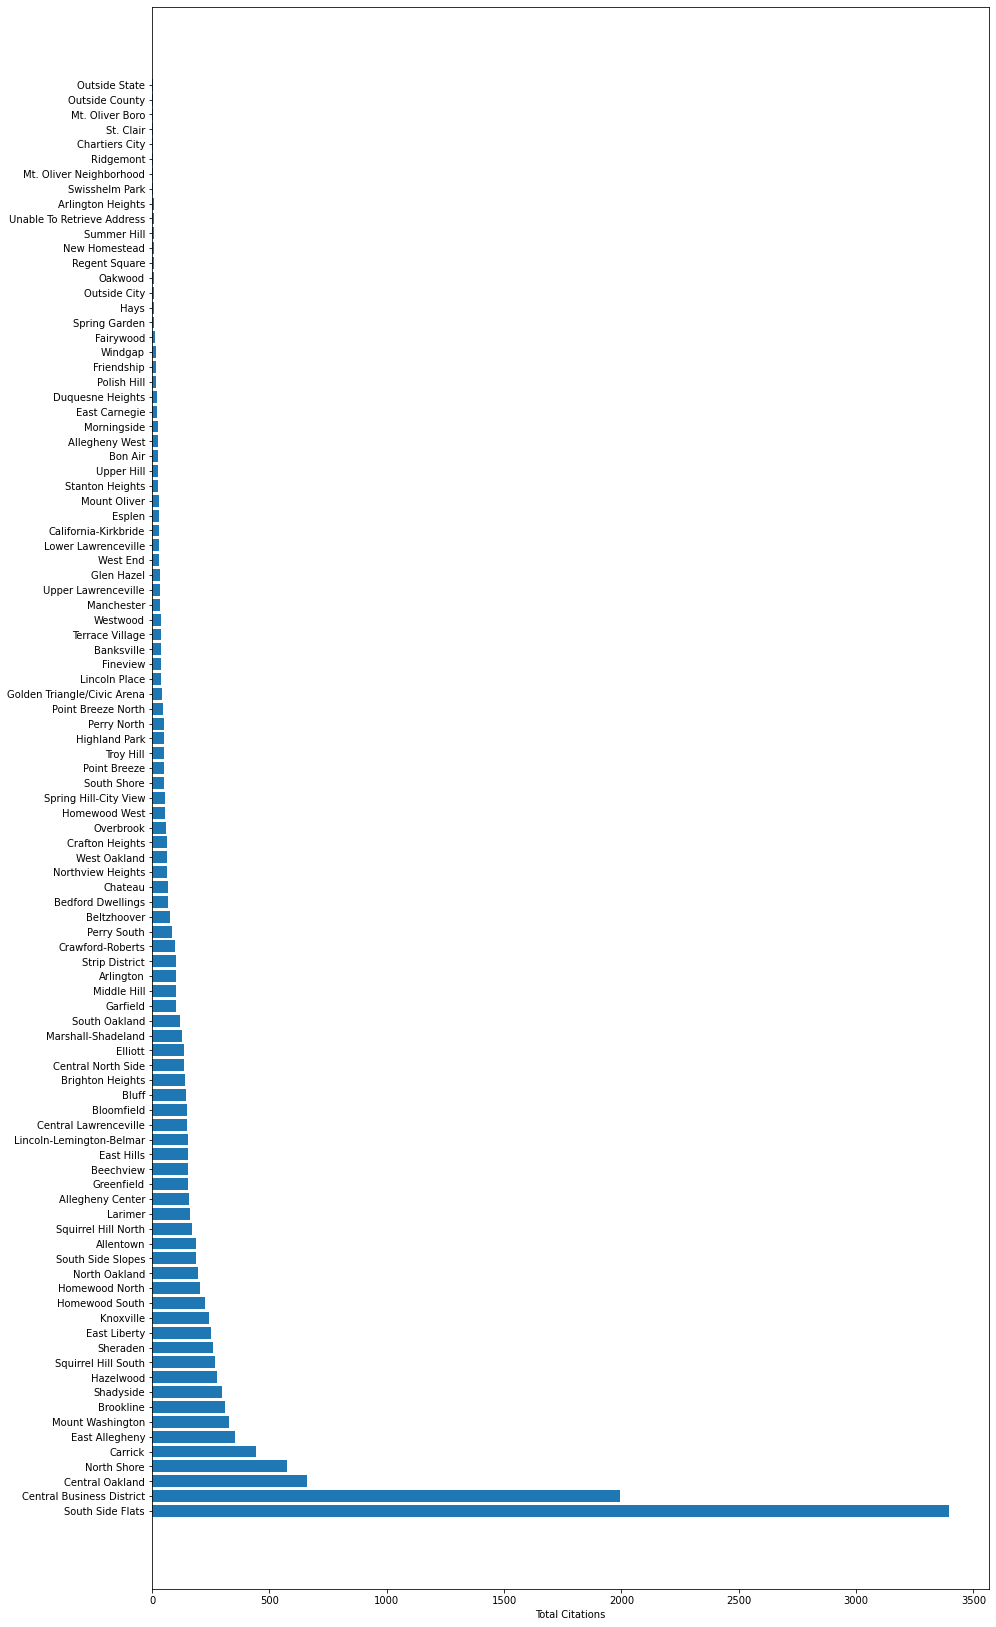

In [7]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



data = pd.read_csv("Non-Traffic-Citations.csv")

citations_In_Neighborhood = data.groupby("NEIGHBORHOOD").size()

d3 = pd.DataFrame( {"number of citations" : citations_In_Neighborhood} )

d3.reset_index(inplace=True)

d3.columns = [ "Neighborhood" , "Number_of_Citations" ]



# Convert 'Number_of_Citations' to numeric
d3['Number_of_Citations'] = pd.to_numeric(d3['Number_of_Citations'], errors='coerce')

# Sort the DataFrame by 'Number_of_Arrests' in descending order
d3_sorted = d3.sort_values(by='Number_of_Citations', ascending=False)

# Plotting the horizontal bar graph using Matplotlib directly
plt.figure(figsize=(15, d3_sorted.shape[0] * 0.3))
plt.barh(d3_sorted['Neighborhood'], d3_sorted['Number_of_Citations'])
plt.xlabel("Total Citations")
plt.show()

#### Code Below - Zooming in on the 10 neighborhoods with the least amount of Non-Traffic Citations

Text(0.5, 0, 'Total Citations')

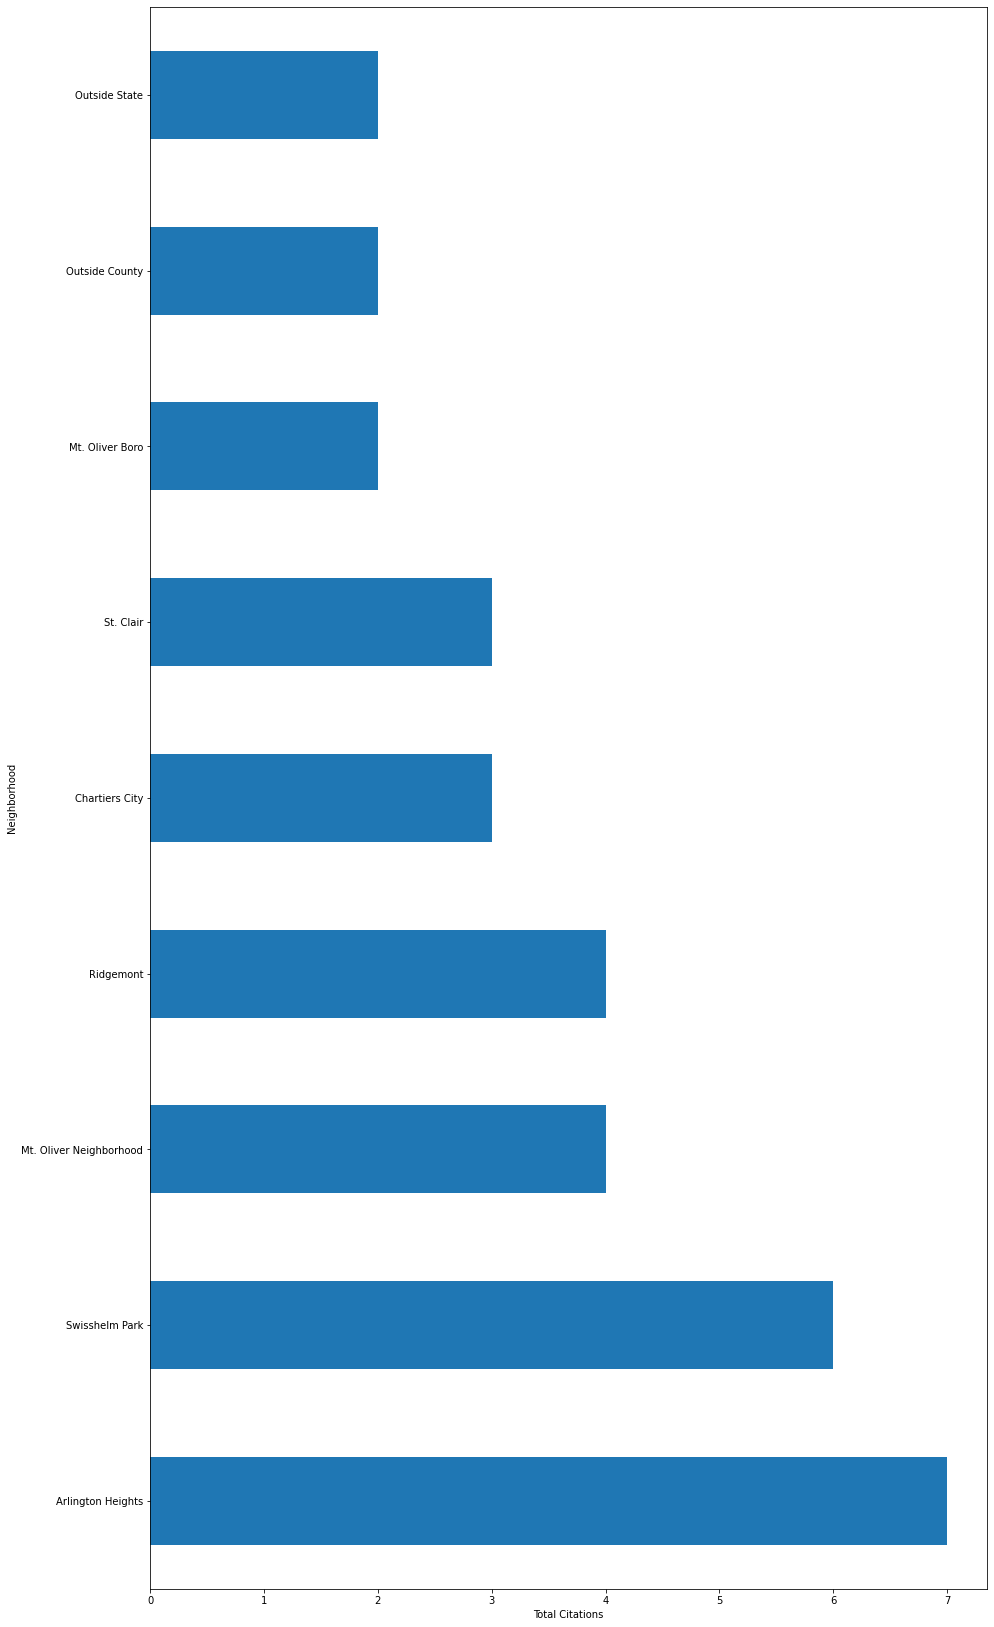

In [23]:
d3_sorted = d3.sort_values(by='Number_of_Citations', ascending=False )
graph = d3_sorted[88:].plot.barh(x="Neighborhood",y="Number_of_Citations",figsize=(15,d3_sorted.shape[0] * 0.3), legend=None)
graph.set_xlabel("Total Citations")

#### Code Below - Combining all 3 sub-metrics (Total Arrests, Total Fire Incidents, Total Citations)     
#### from each neighborhood into one big overall metric called "Total Incidents"

In [13]:
import pandas as pd

# Read the datasets
arrests = pd.read_csv("Pittsburgh-Police-Arrest-Data.csv")
fire_incidents = pd.read_csv("Fire-Incidents-Pittsburgh.csv")
citations = pd.read_csv("Non-Traffic-Citations.csv")

# Calculate total number of arrests in each neighborhood
arrests_in_neighborhoods = arrests.groupby("INCIDENTNEIGHBORHOOD").size().reset_index(name='Number_of_Arrests')

# Calculate total number of fires in each neighborhood
fires_in_neighborhoods = fire_incidents.groupby("neighborhood").size().reset_index(name='Number_of_Fire_Incidents')

# Calculate total number of non-traffic citations in each neighborhood
citations_in_neighborhoods = citations.groupby("NEIGHBORHOOD").size().reset_index(name='Number_of_Citations')

# Merge the datasets on the common "Neighborhood" column
combined_data = pd.merge(arrests_in_neighborhoods, fires_in_neighborhoods, how='outer', left_on='INCIDENTNEIGHBORHOOD', right_on='neighborhood')
combined_data = pd.merge(combined_data, citations_in_neighborhoods, how='outer', left_on='INCIDENTNEIGHBORHOOD', right_on='NEIGHBORHOOD')

# Drop redundant columns
combined_data = combined_data.drop(['neighborhood', 'NEIGHBORHOOD'], axis=1)

# Fill NaN values with 0
combined_data = combined_data.fillna(0)

# Calculate the total number of incidents
combined_data['Total_Incidents'] = combined_data['Number_of_Arrests'] + combined_data['Number_of_Fire_Incidents'] + combined_data['Number_of_Citations']

# Display the combined dataframe
print(combined_data)

            INCIDENTNEIGHBORHOOD  Number_of_Arrests  Number_of_Fire_Incidents  \
0               Allegheny Center             1227.0                      62.0   
1                 Allegheny West              127.0                      42.0   
2                      Allentown              930.0                     125.0   
3                      Arlington              302.0                      51.0   
4              Arlington Heights              153.0                      13.0   
5                     Banksville              288.0                      59.0   
6              Bedford Dwellings              656.0                      43.0   
7                      Beechview             1167.0                     146.0   
8                    Beltzhoover              489.0                     129.0   
9                     Bloomfield              972.0                     170.0   
10                         Bluff             1463.0                     141.0   
11                       Bon

#### Using the data to create a bar graph of the Neighborhoods and the Total Incidents across all 3 sub-metrics

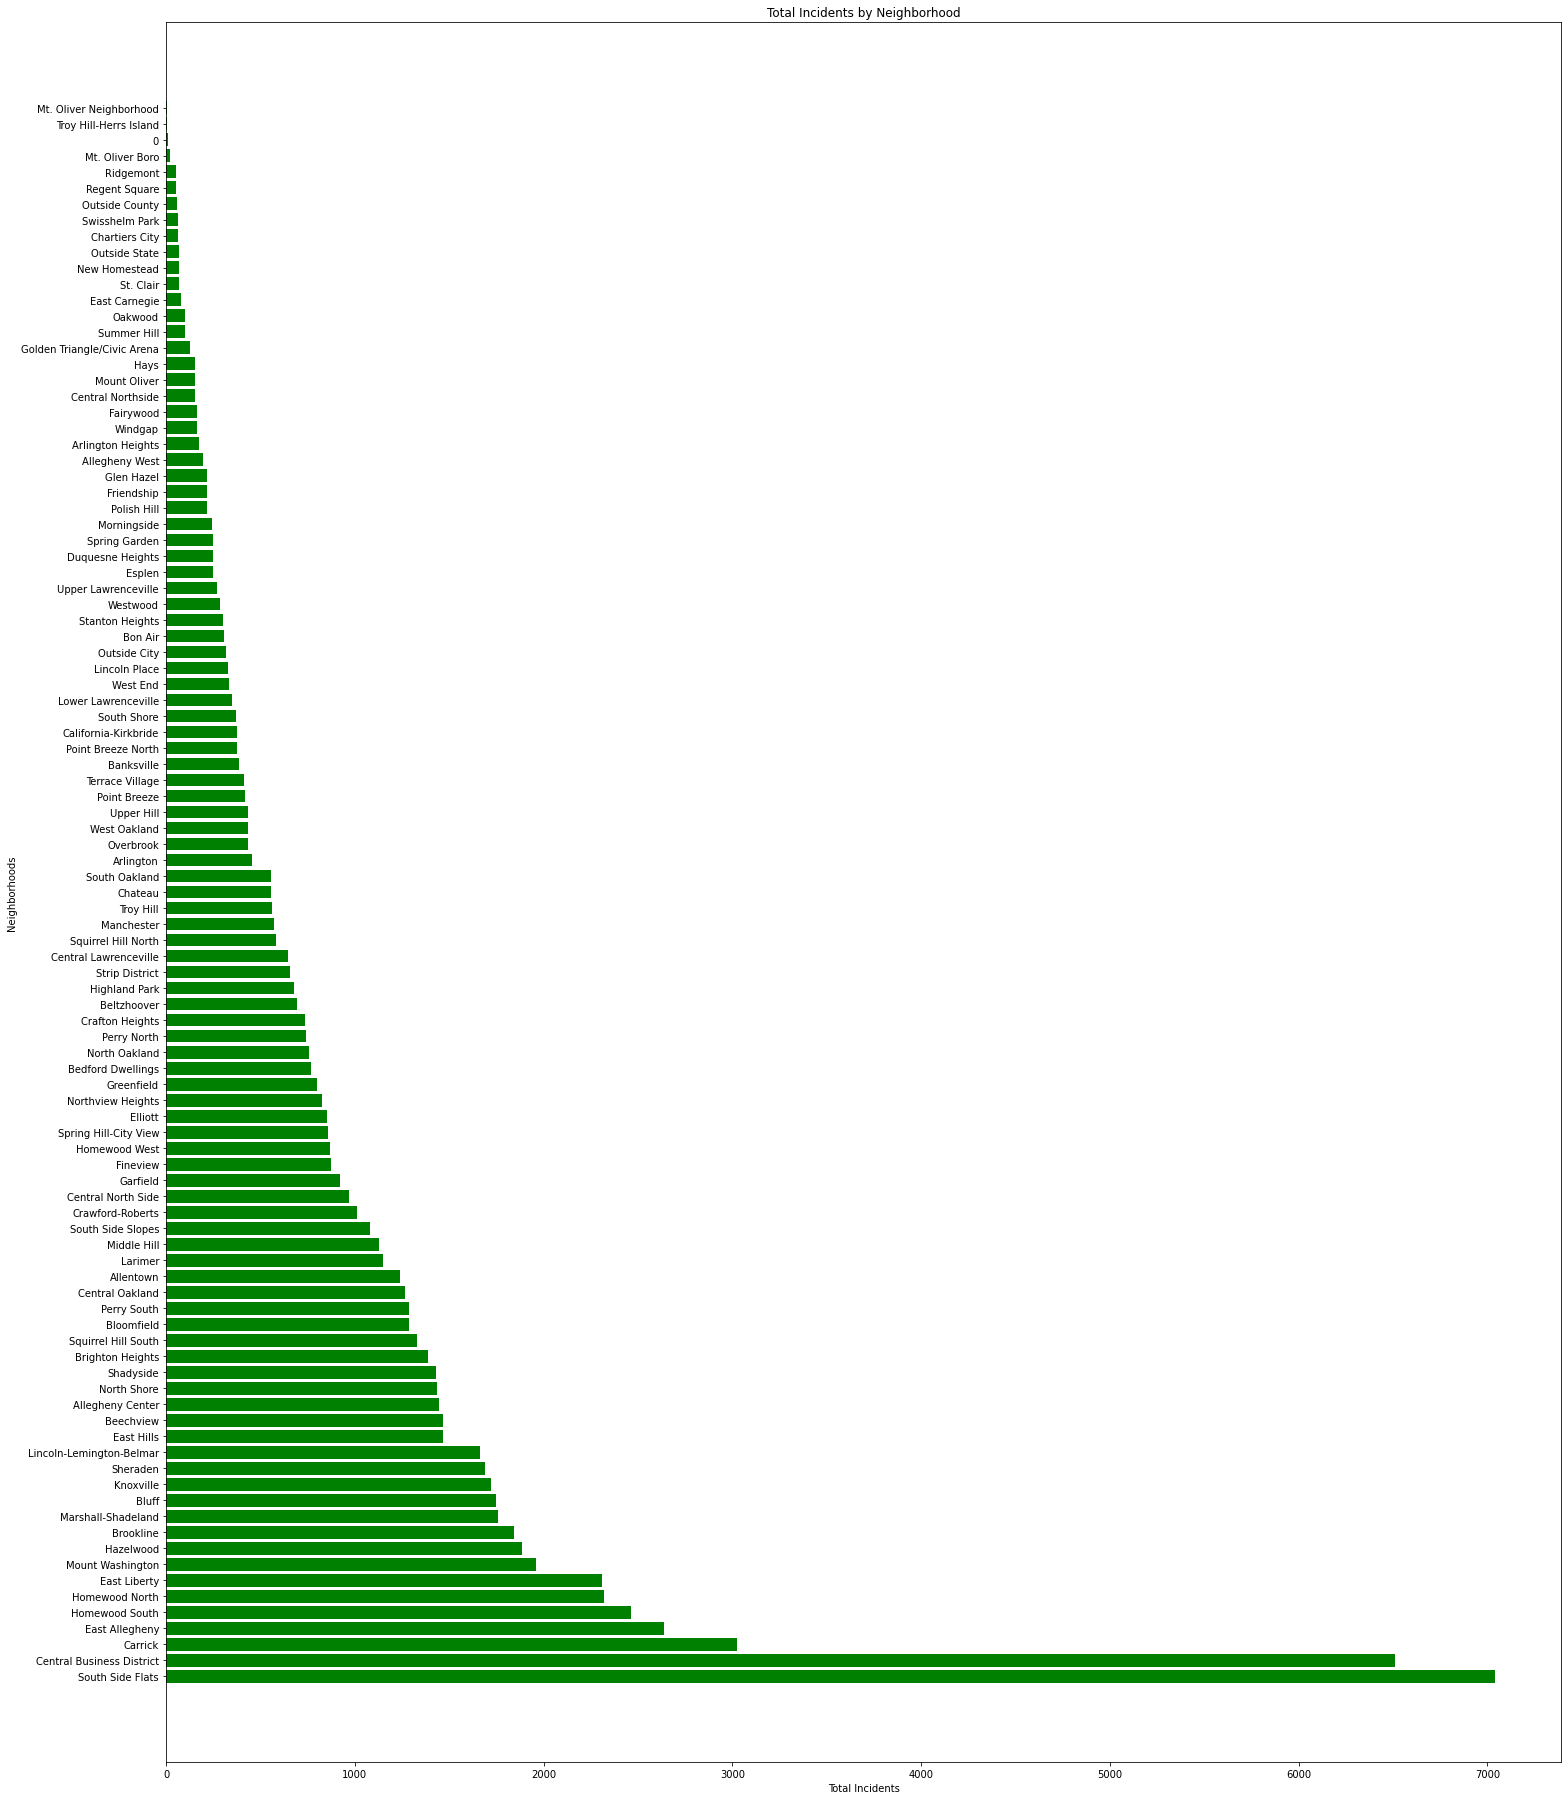

In [20]:
import matplotlib.pyplot as plt

# Assuming 'combined_data' is your combined dataframe
plt.figure(figsize=(25, 32))

# Sort the dataframe by Total_Incidents in descending order
combined_data = combined_data.sort_values(by='Total_Incidents', ascending=False)

# Convert 'INCIDENTNEIGHBORHOOD' to strings
combined_data['INCIDENTNEIGHBORHOOD'] = combined_data['INCIDENTNEIGHBORHOOD'].astype(str)

# Create a horizontal bar graph
plt.barh(combined_data['INCIDENTNEIGHBORHOOD'], combined_data['Total_Incidents'], color='green')

# Set labels and title
plt.xlabel('Total Incidents')
plt.ylabel('Neighborhoods')
plt.title('Total Incidents by Neighborhood')

# Show the plot
plt.show()

#### Zooming in on the 10 neighborhoods with the least number of Total Incidents

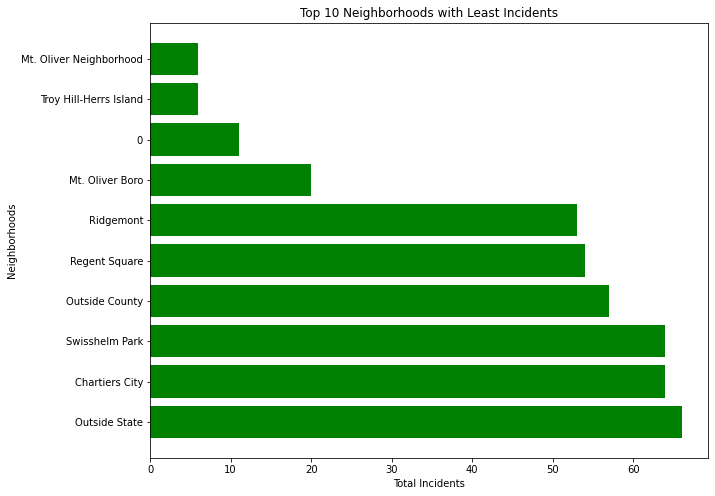

In [25]:


# Assuming 'combined_data' is your combined dataframe
plt.figure(figsize=(10, 8))

# Sort the dataframe by Total_Incidents in descending order
combined_data = combined_data.sort_values(by='Total_Incidents', ascending=False)

# Convert 'INCIDENTNEIGHBORHOOD' to strings
combined_data['INCIDENTNEIGHBORHOOD'] = combined_data['INCIDENTNEIGHBORHOOD'].astype(str)

# Slice the top 10 neighborhoods with least incidents
top_10_least_incidents = combined_data.tail(12)

# Create a horizontal bar graph for the top 10 least incidents
plt.barh(top_10_least_incidents['INCIDENTNEIGHBORHOOD'], top_10_least_incidents['Total_Incidents'], color='green')

# Set labels and title
plt.xlabel('Total Incidents')
plt.ylabel('Neighborhoods')
plt.title('Top 10 Neighborhoods with Least Incidents')

# Show the plot
plt.show()

#### Conclusion - A tie between Mt.Oliver Neighborhood and Troy-Hill


## Conclusion:

The neighborhood that overlapped the most in our findings was Mount Oliver Neighborhood/Troy-Hill.

Nischal's Reflection: The datasets all point to the best neighborhood being Mount Oliver Neighborhood/Troy-Hill.  
However, my personal favorite is Carrick! My favorite neighborhood is Carrick because that's where   
I grew up and I have a lot of good memories there. Though the stats say that Mount Oliver Borough   
is the best I still prefer Carrick for the things that can't be said by statistics.



Mia's Reflection: The data driven determination presented Mount Oliver Neighborhood/Troy-Hill as the “best” neighborhood, however, with my experience of living in Pittsburgh for the past three months, I’ve come to love the Strip District neighborhood. The walkability of the Strip District makes it a pleasant place to visit because you can walk to all of the nearby shops and restaurants. The PRT also runs through the neighborhood making it more accessible if you’re coming from a farther neighborhood in Pittsburgh. 

